#### Full Linear Regression Anaylsis
Analyze auto-mpg.csv using a multi-factor approach, including interaction terms.

Step 1:  Plot MPG (miles per gallon) vs. each of the other factors in the data set

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Text(0, 0.5, 'mpg')

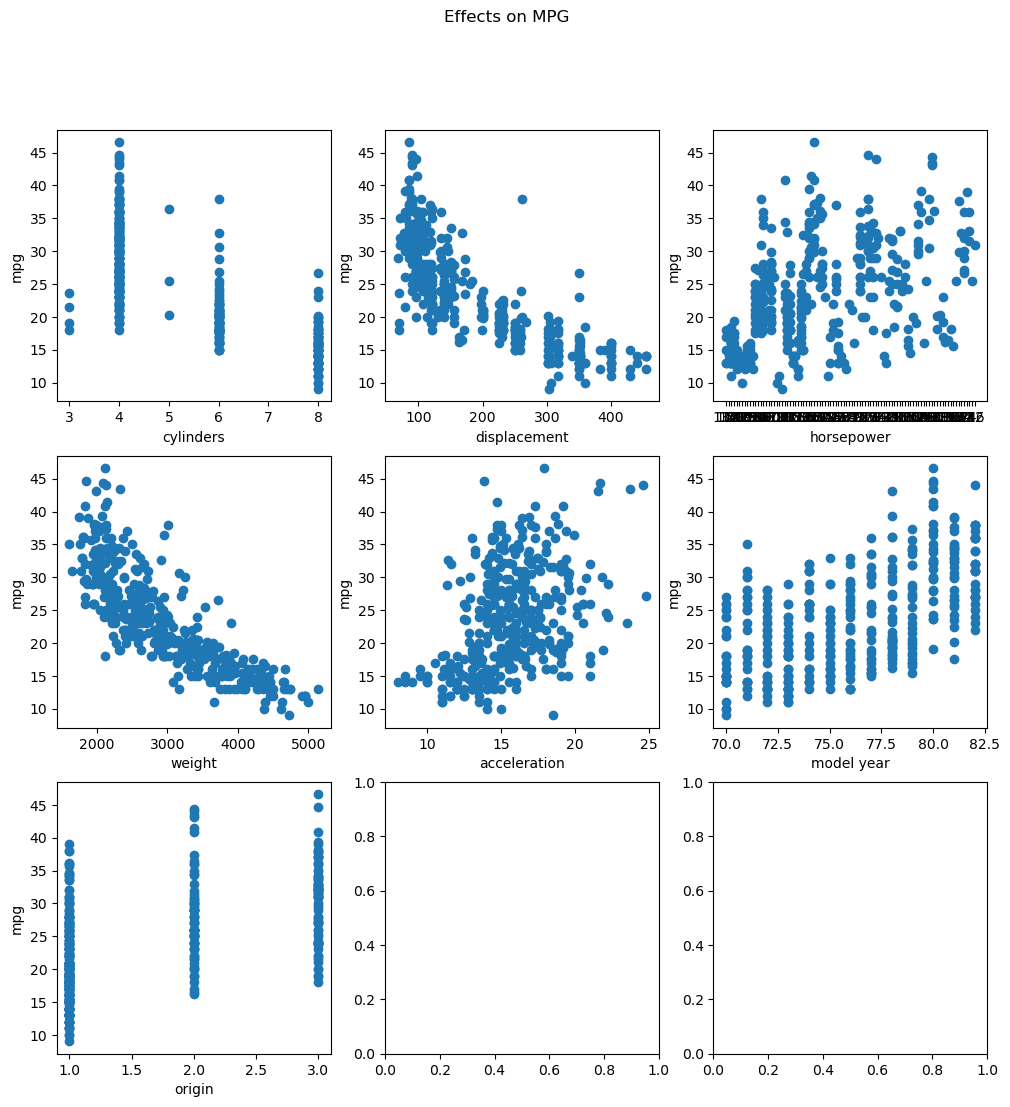

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# Get the data
data = pd.read_csv('auto-mpg.csv')
print(data.head())

fig, ax = plt.subplots(3, 3, figsize=(12,12))
fig.suptitle("Effects on MPG")
ax[0][0].plot(data['cylinders'], data['mpg'], 'o', label = "Data")
ax[0][0].set_xlabel('cylinders')
ax[0][0].set_ylabel('mpg')

ax[0][1].plot(data['displacement'], data['mpg'], 'o', label = "Data")
ax[0][1].set_xlabel('displacement')
ax[0][1].set_ylabel('mpg')

ax[0][2].plot(data['horsepower'], data['mpg'], 'o', label = "Data")
ax[0][2].set_xlabel('horsepower')
ax[0][2].set_ylabel('mpg')

ax[1][0].plot(data['weight'], data['mpg'], 'o', label = "Data")
ax[1][0].set_xlabel('weight')
ax[1][0].set_ylabel('mpg')

ax[1][1].plot(data['acceleration'], data['mpg'], 'o', label = "Data")
ax[1][1].set_xlabel('acceleration')
ax[1][1].set_ylabel('mpg')

ax[1][2].plot(data['model year'], data['mpg'], 'o', label = "Data")
ax[1][2].set_xlabel('model year')
ax[1][2].set_ylabel('mpg')

ax[2][0].plot(data['origin'], data['mpg'], 'o', label = "Data")
ax[2][0].set_xlabel('origin')
ax[2][0].set_ylabel('mpg')

Step 2:  “Clean” the data.  There are two important aspects to this.  You will find that the ‘horsepower’ data is not a simple integer or floating point number.  In addition, there are some missing values for this column.  One way of dealing with this is to (a) convert the data to a numeric value and then (b) replace this missing values with the mean value of the remaining data:

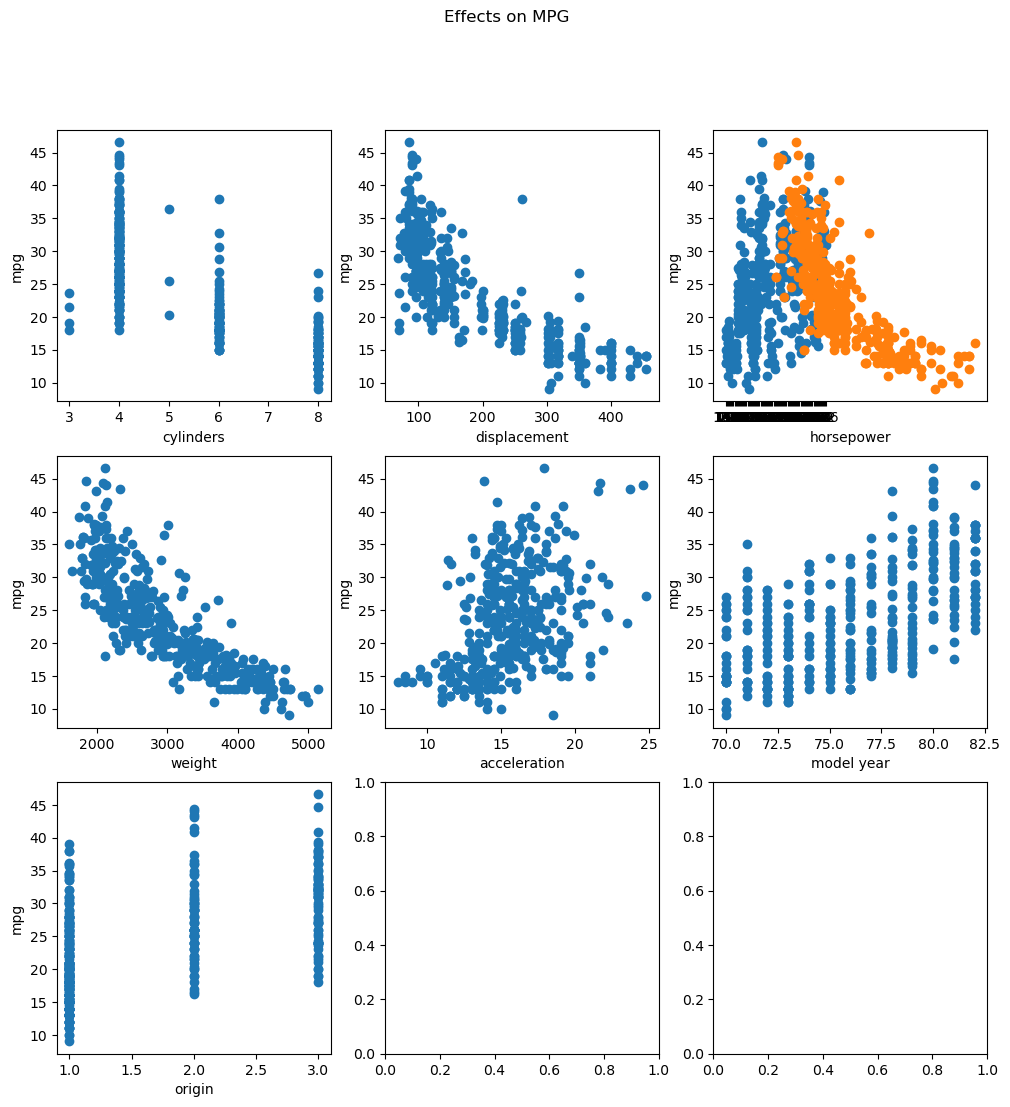

In [3]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
horse_mean = data['horsepower'].mean()
data['horsepower'] = data['horsepower'].fillna(horse_mean)

ax[0][2].plot(data['horsepower'], data['mpg'], 'o', label = "Data")
ax[0][2].set_xlabel('horsepower')
ax[0][2].set_ylabel('mpg')

fig

Step 3:  Create NORMALIZED column data for each of the factors, as we did in the example presented in class.

Text(0, 0.5, 'mpg')

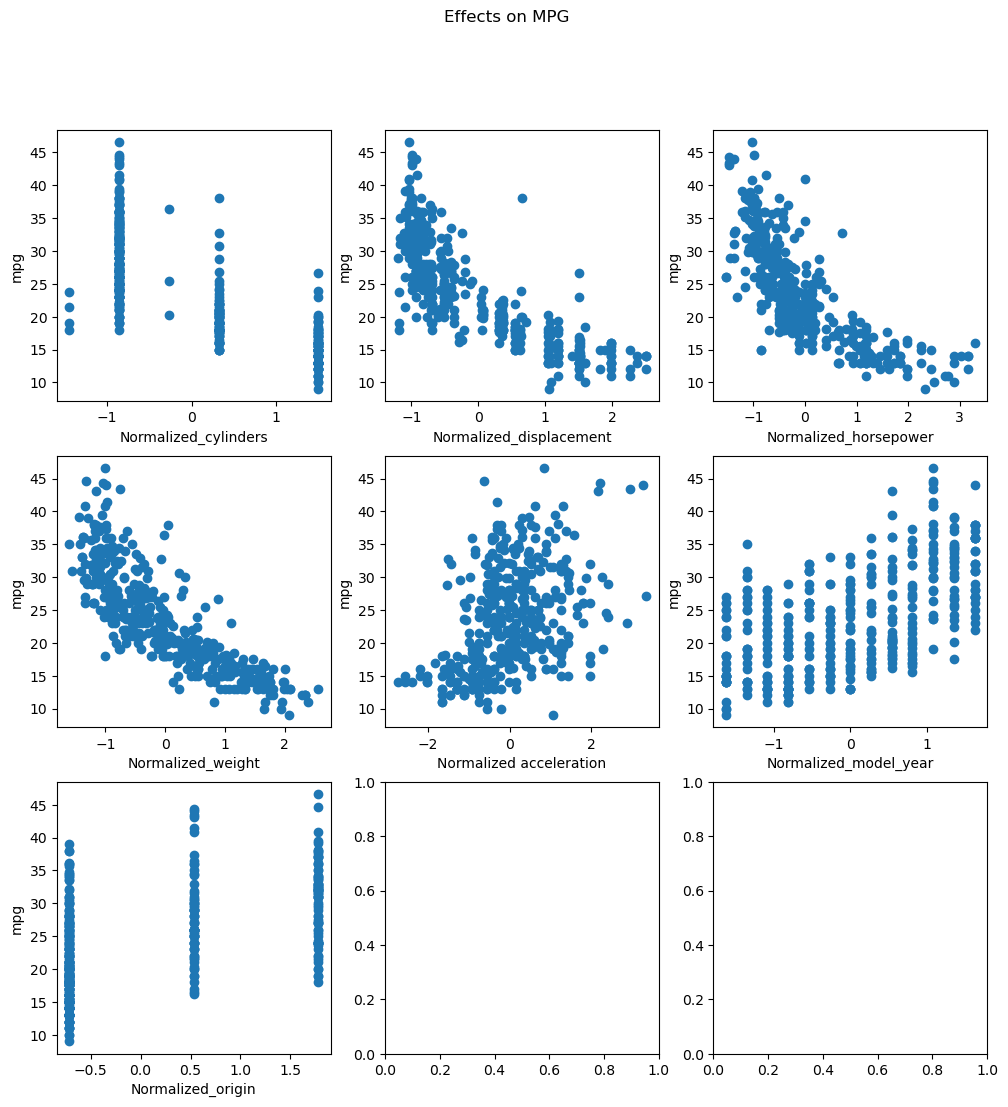

In [4]:
data["Normalized_cylinders"] = (data['cylinders'] - data['cylinders'].mean()) / data['cylinders'].std()
data["Normalized_displacement"] = (data['displacement'] - data['displacement'].mean()) / data['displacement'].std()
data["Normalized_horsepower"] = (data['horsepower'] - data['horsepower'].mean()) / data['horsepower'].std()
data["Normalized_weight"] = (data['weight'] - data['weight'].mean()) / data['weight'].std()
data["Normalized_acceleration"] = (data['acceleration'] - data['acceleration'].mean()) / data['acceleration'].std()
data["Normalized_model_year"] = (data['model year'] - data['model year'].mean()) / data['model year'].std()
data["Normalized_origin"] = (data['origin'] - data['origin'].mean()) / data['origin'].std()

fig, ax = plt.subplots(3, 3, figsize=(12,12))
fig.suptitle("Effects on MPG")
ax[0][0].plot(data['Normalized_cylinders'], data['mpg'], 'o', label = "Data")
ax[0][0].set_xlabel('Normalized_cylinders')
ax[0][0].set_ylabel('mpg')

ax[0][1].plot(data['Normalized_displacement'], data['mpg'], 'o', label = "Data")
ax[0][1].set_xlabel('Normalized_displacement')
ax[0][1].set_ylabel('mpg')

ax[0][2].plot(data['Normalized_horsepower'], data['mpg'], 'o', label = "Data")
ax[0][2].set_xlabel('Normalized_horsepower')
ax[0][2].set_ylabel('mpg')

ax[1][0].plot(data['Normalized_weight'], data['mpg'], 'o', label = "Data")
ax[1][0].set_xlabel('Normalized_weight')
ax[1][0].set_ylabel('mpg')

ax[1][1].plot(data['Normalized_acceleration'], data['mpg'], 'o', label = "Data")
ax[1][1].set_xlabel('Normalized acceleration')
ax[1][1].set_ylabel('mpg')

ax[1][2].plot(data['Normalized_model_year'], data['mpg'], 'o', label = "Data")
ax[1][2].set_xlabel('Normalized_model_year')
ax[1][2].set_ylabel('mpg')

ax[2][0].plot(data['Normalized_origin'], data['mpg'], 'o', label = "Data")
ax[2][0].set_xlabel('Normalized_origin')
ax[2][0].set_ylabel('mpg')

Step 4:  Create and fit a linear regression model that just includes the terms linear in the factors (i.e. do not include any interation terms or higher order terms).  Once fit, create a column in the data frame for the predictions and residuals of this model.  As a measure of how well this model does, you might create a histogram of the residuals, and extract the standard deviation of the residuals.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.25e-141
Time:                        16:07:30   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Text(0, 0.5, 'mpg')

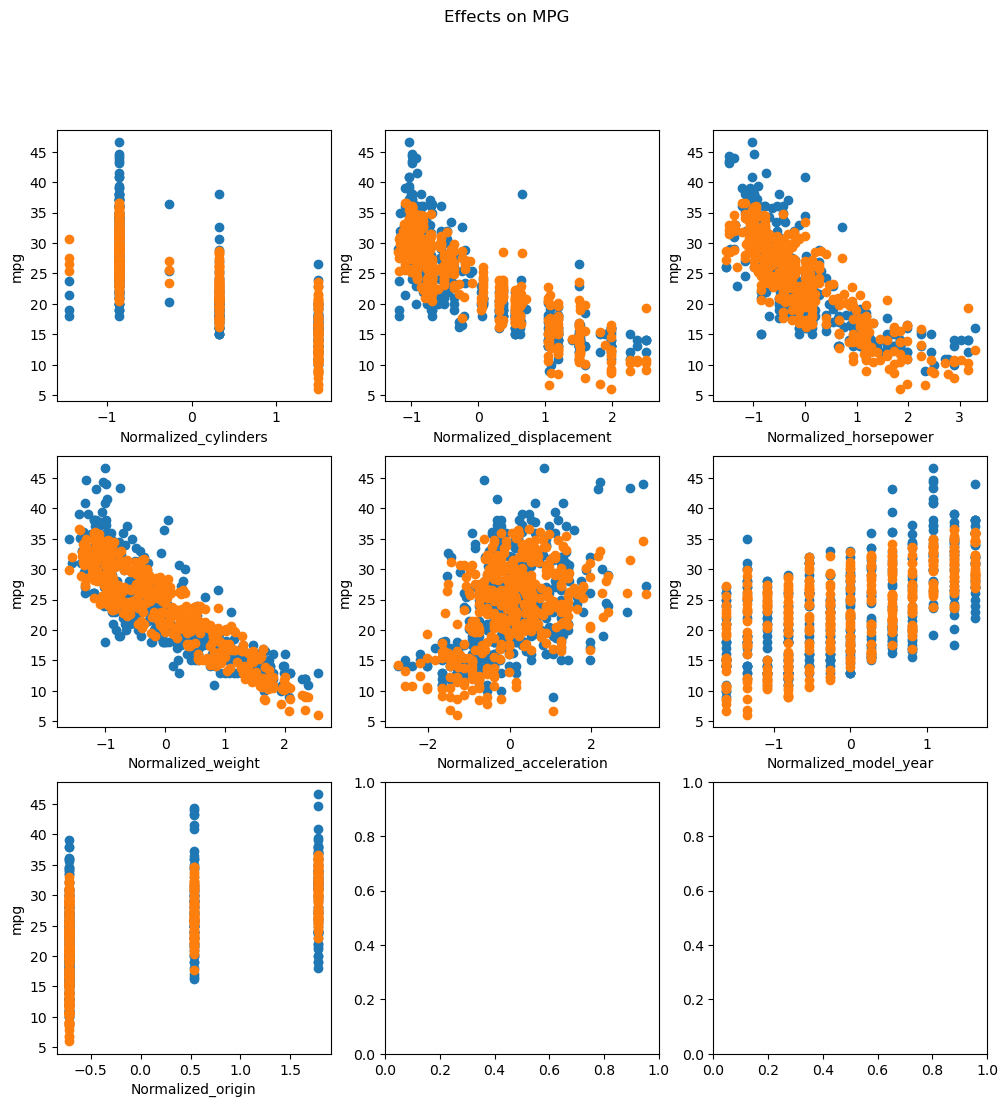

In [14]:
model = smf.ols('mpg ~ Normalized_cylinders + Normalized_displacement + Normalized_horsepower + Normalized_weight + Normalized_acceleration + Normalized_model_year + Normalized_origin', data=data)
model = model.fit()

print(model.summary())

mpg_pred = model.predict()

data['mpg_Predicted'] = mpg_pred
data['mpg_Residual'] = data['mpg'] - mpg_pred
# print(data.head())

fig, ax = plt.subplots(3, 3, figsize=(12,12))
fig.suptitle("Effects on MPG")
ax[0][0].plot(data['Normalized_cylinders'], data['mpg'], 'o', label = "Data")
ax[0][0].plot(data['Normalized_cylinders'], data['mpg_Predicted'], 'o', label = "Predicted_Data")
ax[0][0].set_xlabel('Normalized_cylinders')
ax[0][0].set_ylabel('mpg')

ax[0][1].plot(data['Normalized_displacement'], data['mpg'], 'o', label = "Data")
ax[0][1].plot(data['Normalized_displacement'], data['mpg_Predicted'], 'o', label = "Predicted_Data")
ax[0][1].set_xlabel('Normalized_displacement')
ax[0][1].set_ylabel('mpg')

ax[0][2].plot(data['Normalized_horsepower'], data['mpg'], 'o', label = "Data")
ax[0][2].plot(data['Normalized_horsepower'], data['mpg_Predicted'], 'o', label = "Predicted_Data")
ax[0][2].set_xlabel('Normalized_horsepower')
ax[0][2].set_ylabel('mpg')

ax[1][0].plot(data['Normalized_weight'], data['mpg'], 'o', label = "Data")
ax[1][0].plot(data['Normalized_weight'], data['mpg_Predicted'], 'o', label = "Predicted_Data")
ax[1][0].set_xlabel('Normalized_weight')
ax[1][0].set_ylabel('mpg')

ax[1][1].plot(data['Normalized_acceleration'], data['mpg'], 'o', label = "Data")
ax[1][1].plot(data['Normalized_acceleration'], data['mpg_Predicted'], 'o', label = "Predicted_Data")
ax[1][1].set_xlabel('Normalized_acceleration')
ax[1][1].set_ylabel('mpg')

ax[1][2].plot(data['Normalized_model_year'], data['mpg'], 'o', label = "Data")
ax[1][2].plot(data['Normalized_model_year'], data['mpg_Predicted'], 'o', label = "Predicted_Data")
ax[1][2].set_xlabel('Normalized_model_year')
ax[1][2].set_ylabel('mpg')

ax[2][0].plot(data['Normalized_origin'], data['mpg'], 'o', label = "Data")
ax[2][0].plot(data['Normalized_origin'], data['mpg_Predicted'], 'o', label = "Predicted_Data")
ax[2][0].set_xlabel('Normalized_origin')
ax[2][0].set_ylabel('mpg')

Residual Standard Deviation: 3.3077231262141895


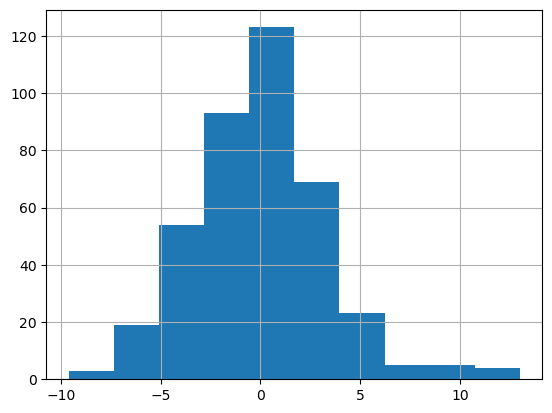

In [15]:
data['mpg_Residual'].hist()
print(f"Residual Standard Deviation: {data['mpg_Residual'].std()}")
# model.conf_int()

Step 5:  Remove any terms in the model that are not statistically significant (P < 0.05) and refit with this new model.

|                          | P>\|t\| | 
|--------------------------|---------| 
| Intercept                | 0.000   |   
| Normalized_cylinders     | 0.195   | 
| Normalized_displacement* | 0.012   | 
| Normalized_horsepower    | 0.388   | 
| Normalized_weight*       | 0.000   | 
| Normalized_acceleration  | 0.287   | 
| Normalized_model_year*   | 0.000   | 
| Normalized_origin*       | 0.000   | 

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.29e-144
Time:                        15:33:50   Log-Likelihood:                -1043.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     393   BIC:                             2117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

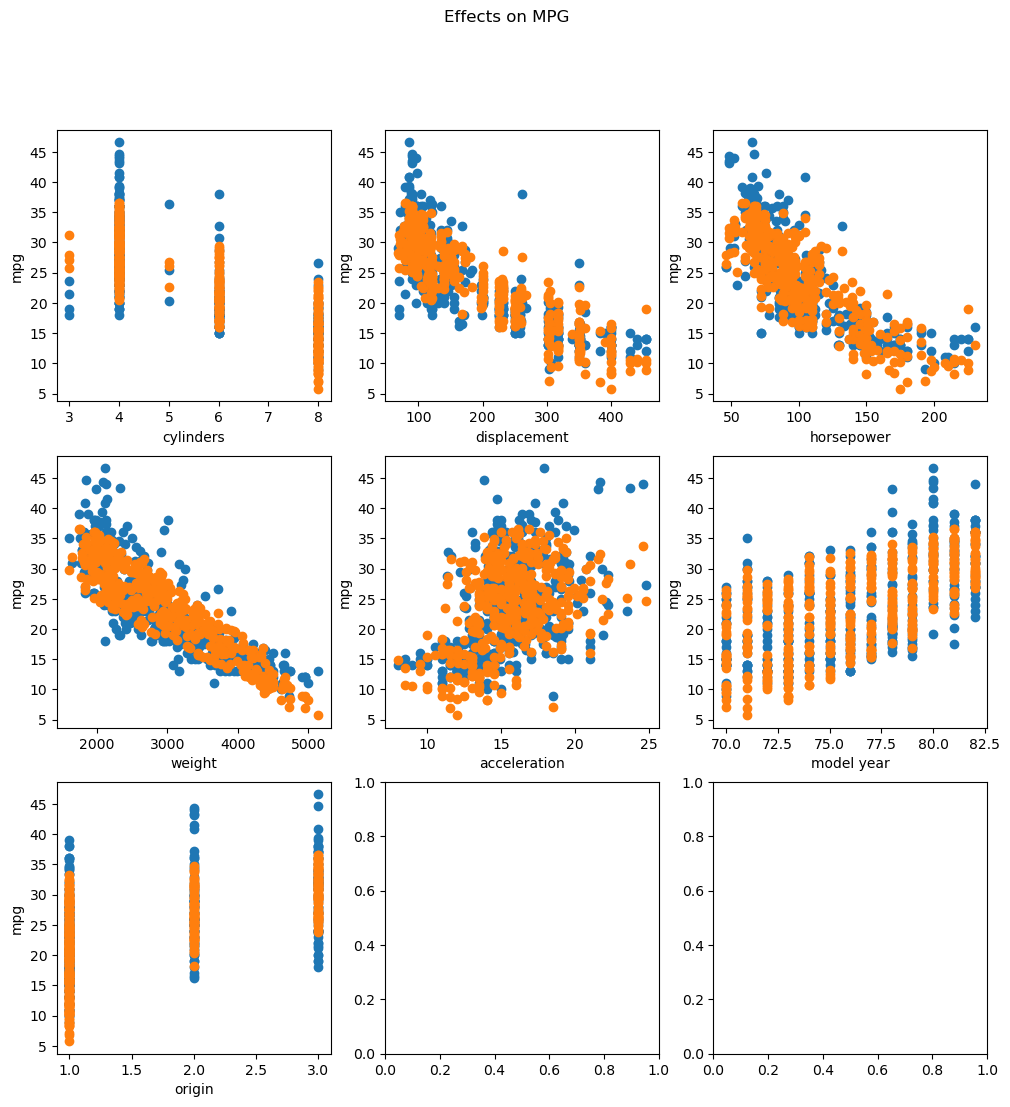

In [7]:
new_model = smf.ols('mpg ~ Normalized_displacement + Normalized_weight + Normalized_model_year + Normalized_origin', data=data)
new_model = new_model.fit()

print(new_model.summary())

new_mpg_pred = new_model.predict()

data['new_mpg_Predicted'] = new_mpg_pred
data['new_mpg_Residual'] = data['mpg'] - new_mpg_pred

fig, ax = plt.subplots(3, 3, figsize=(12,12))
fig.suptitle("Effects on MPG")
ax[0][0].plot(data['cylinders'], data['mpg'], 'o', label = "Data")
ax[0][0].plot(data['cylinders'], data['new_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[0][0].set_xlabel('cylinders')
ax[0][0].set_ylabel('mpg')

ax[0][1].plot(data['displacement'], data['mpg'], 'o', label = "Data")
ax[0][1].plot(data['displacement'], data['new_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[0][1].set_xlabel('displacement')
ax[0][1].set_ylabel('mpg')

ax[0][2].plot(data['horsepower'], data['mpg'], 'o', label = "Data")
ax[0][2].plot(data['horsepower'], data['new_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[0][2].set_xlabel('horsepower')
ax[0][2].set_ylabel('mpg')

ax[1][0].plot(data['weight'], data['mpg'], 'o', label = "Data")
ax[1][0].plot(data['weight'], data['new_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[1][0].set_xlabel('weight')
ax[1][0].set_ylabel('mpg')

ax[1][1].plot(data['acceleration'], data['mpg'], 'o', label = "Data")
ax[1][1].plot(data['acceleration'], data['new_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[1][1].set_xlabel('acceleration')
ax[1][1].set_ylabel('mpg')

ax[1][2].plot(data['model year'], data['mpg'], 'o', label = "Data")
ax[1][2].plot(data['model year'], data['new_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[1][2].set_xlabel('model year')
ax[1][2].set_ylabel('mpg')

ax[2][0].plot(data['origin'], data['mpg'], 'o', label = "Data")
ax[2][0].plot(data['origin'], data['new_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[2][0].set_xlabel('origin')
ax[2][0].set_ylabel('mpg')

print(f"New Residual Standard Deviation: {data['new_mpg_Residual'].std()}")

Step 6:  Now, add in the interaction terms.  You should add back into the model all of the first order linear terms (even if they are not statistically significant in Step 5).  Note that if there are seven possible factors that might affect MPG, then there will be ( 6 + 5 + 4 + 3 + 2 + 1 = ) 21 additional interaction terms.  So, you should then have a model with 28 total terms!

In [8]:
all_model = smf.ols('mpg ~ Normalized_cylinders * Normalized_displacement + '
                    'Normalized_cylinders * Normalized_horsepower +'
                    'Normalized_cylinders * Normalized_weight + '
                    'Normalized_cylinders * Normalized_acceleration +'
                    'Normalized_cylinders * Normalized_model_year + '
                    'Normalized_cylinders * Normalized_origin +'
                    'Normalized_displacement * Normalized_horsepower + '
                    'Normalized_displacement * Normalized_weight + '
                    'Normalized_displacement * Normalized_acceleration + '
                    'Normalized_displacement * Normalized_model_year + '
                    'Normalized_displacement * Normalized_origin + '
                    'Normalized_horsepower * Normalized_weight + '
                    'Normalized_horsepower * Normalized_acceleration + '
                    'Normalized_horsepower * Normalized_model_year + '
                    'Normalized_horsepower * Normalized_origin + '
                    'Normalized_weight * Normalized_acceleration + '
                    'Normalized_weight * Normalized_model_year + '
                    'Normalized_weight * Normalized_origin + '
                    'Normalized_acceleration * Normalized_model_year + '
                    'Normalized_acceleration * Normalized_origin + '
                    'Normalized_model_year * Normalized_origin', data=data)
all_model = all_model.fit()

print(all_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     105.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.64e-157
Time:                        15:33:52   Log-Likelihood:                -945.50
No. Observations:                 398   AIC:                             1949.
Df Residuals:                     369   BIC:                             2065.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Step 7:  Fit the data with this model, create predictions, residuals, histogram of residuals, and standard deviation of residuals.  Which interaction terms are significant?   Is this model better?

Residual Standard Deviation: 2.6063316722600316


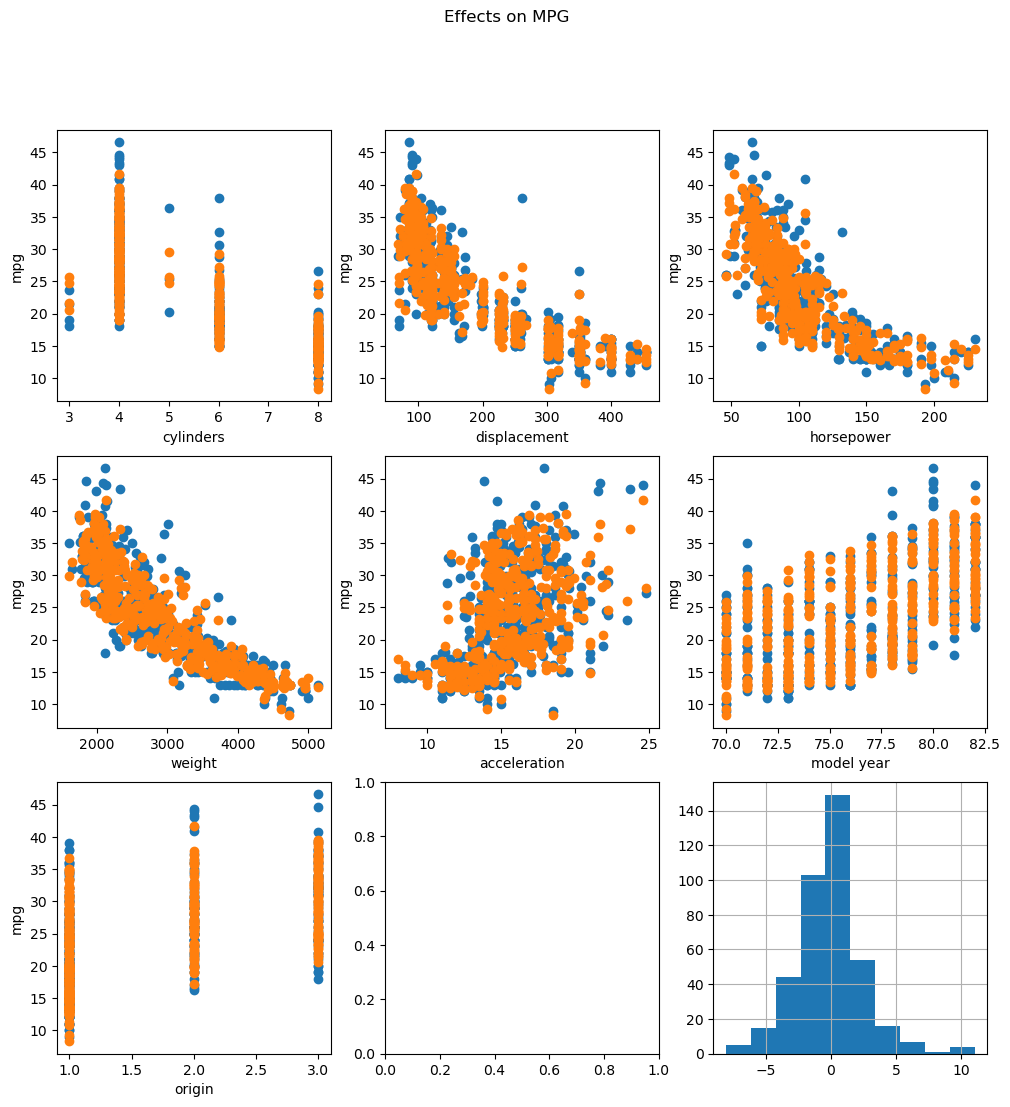

In [12]:
all_mpg_pred = all_model.predict()

data['all_mpg_Predicted'] = all_mpg_pred
data['all_mpg_Residual'] = data['mpg'] - all_mpg_pred

fig, ax = plt.subplots(3, 3, figsize=(12,12))
fig.suptitle("Effects on MPG")
ax[0][0].plot(data['cylinders'], data['mpg'], 'o', label = "Data")
ax[0][0].plot(data['cylinders'], data['all_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[0][0].set_xlabel('cylinders')
ax[0][0].set_ylabel('mpg')

ax[0][1].plot(data['displacement'], data['mpg'], 'o', label = "Data")
ax[0][1].plot(data['displacement'], data['all_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[0][1].set_xlabel('displacement')
ax[0][1].set_ylabel('mpg')

ax[0][2].plot(data['horsepower'], data['mpg'], 'o', label = "Data")
ax[0][2].plot(data['horsepower'], data['all_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[0][2].set_xlabel('horsepower')
ax[0][2].set_ylabel('mpg')

ax[1][0].plot(data['weight'], data['mpg'], 'o', label = "Data")
ax[1][0].plot(data['weight'], data['all_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[1][0].set_xlabel('weight')
ax[1][0].set_ylabel('mpg')

ax[1][1].plot(data['acceleration'], data['mpg'], 'o', label = "Data")
ax[1][1].plot(data['acceleration'], data['all_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[1][1].set_xlabel('acceleration')
ax[1][1].set_ylabel('mpg')

ax[1][2].plot(data['model year'], data['mpg'], 'o', label = "Data")
ax[1][2].plot(data['model year'], data['all_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[1][2].set_xlabel('model year')
ax[1][2].set_ylabel('mpg')

ax[2][0].plot(data['origin'], data['mpg'], 'o', label = "Data")
ax[2][0].plot(data['origin'], data['all_mpg_Predicted'], 'o', label = "Predicted_Data")
ax[2][0].set_xlabel('origin')
ax[2][0].set_ylabel('mpg')

data['all_mpg_Residual'].hist()
print(f"Residual Standard Deviation: {data['all_mpg_Residual'].std()}")
# model.conf_int()

|                                                 | P>\|t\| | 
|-------------------------------------------------|---------|
| Intercept                                       | 0.000   |  
| Normalized_cylinders                            | 0.296   |   
| Normalized_displacement                         | 0.947   | 
| Normalized_cylinders:Normalized_displacement    | 0.346   |
| *Normalized_horsepower                          | 0.008   |
| Normalized_cylinders:Normalized_horsepower      | 0.453   |
| *Normalized_weight                              | 0.000   |
| Normalized_cylinders:Normalized_weight          | 0.703   |
| Normalized_acceleration                         | 0.806   |
| Normalized_cylinders:Normalized_acceleration    | 0.051   |
| *Normalized_model_year                          | 0.000   |
| Normalized_cylinders:Normalized_model_year      | 0.066   |
| *Normalized_origin                              | 0.015   |
| Normalized_cylinders:Normalized_origin          | 0.551   |
| Normalized_displacement:Normalized_horsepower   | 0.677   |
| *Normalized_displacement:Normalized_weight      | 0.017   |
| Normalized_displacement:Normalized_acceleration | 0.200   |
| *Normalized_displacement:Normalized_model_year  | 0.013   |
| Normalized_displacement:Normalized_origin       | 0.227   |
| Normalized_horsepower:Normalized_weight         | 0.176   |
| Normalized_horsepower:Normalized_acceleration   | 0.065   |
| Normalized_horsepower:Normalized_model_year     | 0.255   |
| Normalized_horsepower:Normalized_origin         | 0.814   |
| Normalized_weight:Normalized_acceleration       | 0.284   |
| Normalized_weight:Normalized_model_year         | 0.146   |
| Normalized_weight:Normalized_origin             | 0.745   |
| *Normalized_acceleration:Normalized_model_year  | 0.010   |
| *Normalized_acceleration:Normalized_origin      | 0.002   |
| *Normalized_model_year:Normalized_origin        | 0.041   |

Of the interaction terms, Normalized_displacement:Normalized_weight, Normalized_displacement:Normalized_model_year, Normalized_acceleration:Normalized_model_year, Normalized_acceleration:Normalized_origin, and Normalized_model_year:Normalized_origin are significant because they have a p-value less than 0.05.

I believe this model is better based on the residual std and the r-squared values/

Step 8:  Remove all of the terms (both linear and interaction) that are not statistically significant (P<0.05) and refit everything.  What is the final residual standard deviation that you get?

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     305.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.86e-170
Time:                        16:29:30   Log-Likelihood:                -966.91
No. Observations:                 398   AIC:                             1954.
Df Residuals:                     388   BIC:                             1994.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

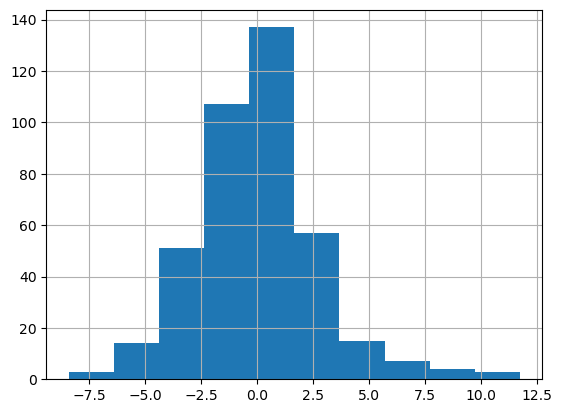

In [16]:
new_all_model = smf.ols('mpg ~ Normalized_horsepower + Normalized_weight + Normalized_model_year + Normalized_origin + Normalized_displacement:Normalized_weight + Normalized_displacement:Normalized_model_year + Normalized_acceleration:Normalized_model_year + Normalized_acceleration:Normalized_origin + Normalized_model_year:Normalized_origin', data=data)

new_all_model = new_all_model.fit()
print(new_all_model.summary())

new_all_mpg_pred = new_all_model.predict()

data['new_all_mpg_Predicted'] = new_all_mpg_pred
data['new_all_mpg_Residual'] = data['mpg'] - new_all_mpg_pred

data['new_all_mpg_Residual'].hist()
print(f"Final Residual Standard Deviation: {data['new_all_mpg_Residual'].std()}")
# model.conf_int()